# DAT210x - Programming with Python for DS

## Module4- Lab2

In [88]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn import preprocessing

In [89]:
# Look pretty...

# matplotlib.style.use('ggplot')
plt.style.use('ggplot')

### Some Boilerplate Code

For your convenience, we've included some boilerplate code here which will help you out. You aren't expected to know how to write this code on your own at this point, but it'll assist with your visualizations. We've added some notes to the code in case you're interested in knowing what it's doing:

### A Note on SKLearn's `.transform()` calls:

Any time you perform a transformation on your data, you lose the column header names because the output of SciKit-Learn's `.transform()` method is an NDArray and not a daraframe.

This actually makes a lot of sense because there are essentially two types of transformations:
- Those that adjust the scale of your features, and
- Those that change alter the number of features, perhaps even changing their values entirely.

An example of adjusting the scale of a feature would be changing centimeters to inches. Changing the feature entirely would be like using PCA to reduce 300 columns to 30. In either case, the original column's units have either been altered or no longer exist at all, so it's up to you to assign names to your columns after any transformation, if you'd like to store the resulting NDArray back into a dataframe.

In [90]:
def scaleFeaturesDF(df):
    # Feature scaling is a type of transformation that only changes the
    # scale, but not number of features. Because of this, we can still
    # use the original dataset's column names... so long as we keep in
    # mind that the _units_ have been altered:

    scaled = preprocessing.StandardScaler().fit_transform(df)
    scaled = pd.DataFrame(scaled, columns=df.columns)
    
    print("New Variances:\n", scaled.var())
    print("New Describe:\n", scaled.describe())
    return scaled

SKLearn contains many methods for transforming your features by scaling them, a type of pre-processing):
    - `RobustScaler`
    - `Normalizer`
    - `MinMaxScaler`
    - `MaxAbsScaler`
    - `StandardScaler`
    - ...

http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

However in order to be effective at PCA, there are a few requirements that must be met, and which will drive the selection of your scaler. PCA requires your data is standardized -- in other words, it's _mean_ should equal 0, and it should have unit variance.

SKLearn's regular `Normalizer()` doesn't zero out the mean of your data, it only clamps it, so it could be inappropriate to use depending on your data. `MinMaxScaler` and `MaxAbsScaler` both fail to set a unit variance, so you won't be using them here either. `RobustScaler` can work, again depending on your data (watch for outliers!). So for this assignment, you're going to use the `StandardScaler`. Get familiar with it by visiting these two websites:

- http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler
- http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler

Lastly, some code to help with visualizations:

In [91]:
def drawVectors(transformed_features, components_, columns, plt, scaled):
    if not scaled:
        return plt.axes() # No cheating ;-)

    num_columns = len(columns)

    # This funtion will project your *original* feature (columns)
    # onto your principal component feature-space, so that you can
    # visualize how "important" each one was in the
    # multi-dimensional scaling

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    ## visualize projections

    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print("Features by importance:\n", important_features)

    ax = plt.axes()

    for i in range(num_columns):
        # Use an arrow to project each original feature as a
        # labeled vector on your principal component axes
        plt.arrow(0, 0, xvector[i], yvector[i], color='b', width=0.0005, head_width=0.02, alpha=0.75)
        plt.text(xvector[i]*1.2, yvector[i]*1.2, list(columns)[i], color='b', alpha=0.75)

    return ax

In [92]:
df = pd.read_csv('/home/shubham/DAT210x/Module4/Datasets/kidney_disease.csv')
df.head()
df.classification.unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [93]:
labels = ['red' if i=='ckd' else 'green' for i in df.classification]

In [94]:
df = df.drop(['id', 'classification'],axis=1)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,15.4,44,7800,5.2,yes,yes,no,good,no,no
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,11.3,38,6000,NaN,no,no,no,good,no,no
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,9.6,31,7500,NaN,no,yes,no,poor,no,yes
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,11.2,32,6700,3.9,yes,no,no,poor,yes,yes
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,11.6,35,7300,4.6,no,no,no,good,no,no


In [95]:
df = pd.get_dummies(df,columns=['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'])

In [96]:
df.pcv = pd.to_numeric(df.pcv, errors='coerce')
df.wc = pd.to_numeric(df.wc, errors='coerce')
df.rc = pd.to_numeric(df.rc, errors='coerce')
df.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
rbc_abnormal        uint8
rbc_normal          uint8
pc_abnormal         uint8
pc_normal           uint8
pcc_notpresent      uint8
pcc_present         uint8
ba_notpresent       uint8
ba_present          uint8
htn_no              uint8
htn_yes             uint8
dm_\tno             uint8
dm_\tyes            uint8
dm_ yes             uint8
dm_no               uint8
dm_yes              uint8
cad_\tno            uint8
cad_no              uint8
cad_yes             uint8
appet_good          uint8
appet_poor          uint8
pe_no               uint8
pe_yes              uint8
ane_no              uint8
ane_yes             uint8
dtype: objec

In [97]:
df.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,dm_yes,cad_ no,cad_no,cad_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,...,1,0,1,0,1,0,1,0,1,0
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,...,0,0,1,0,1,0,1,0,1,0
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,...,1,0,1,0,0,1,1,0,0,1
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,0,0,1,0,0,1,0,1,0,1
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,...,0,0,1,0,1,0,1,0,1,0


In [98]:
df = df.dropna(axis=0)
df.head(20)

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,dm_yes,cad_ no,cad_no,cad_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,0,0,1,0,0,1,0,1,0,1
5,60.0,90.0,1.015,3.0,0.0,74.0,25.0,1.1,142.0,3.2,...,1,0,1,0,1,0,0,1,1,0
9,53.0,90.0,1.020,2.0,0.0,70.0,107.0,7.2,114.0,3.7,...,1,0,1,0,0,1,1,0,0,1
11,63.0,70.0,1.010,3.0,0.0,380.0,60.0,2.7,131.0,4.2,...,1,0,1,0,0,1,0,1,1,0
12,68.0,70.0,1.015,3.0,1.0,208.0,72.0,2.1,138.0,5.8,...,1,0,0,1,0,1,0,1,1,0
14,68.0,80.0,1.010,3.0,2.0,157.0,90.0,4.1,130.0,6.4,...,1,0,0,1,0,1,0,1,1,0
15,40.0,80.0,1.015,3.0,0.0,76.0,162.0,9.6,141.0,4.9,...,0,0,1,0,1,0,1,0,0,1
18,60.0,100.0,1.025,0.0,3.0,263.0,27.0,1.3,135.0,4.3,...,1,0,0,1,1,0,1,0,1,0
20,61.0,80.0,1.015,2.0,0.0,173.0,148.0,3.9,135.0,5.2,...,1,0,0,1,0,1,0,1,0,1
22,48.0,80.0,1.025,4.0,0.0,95.0,163.0,7.7,136.0,3.8,...,0,0,1,0,1,0,1,0,0,1


In [99]:
print df.var()
df.describe()

age               2.446577e+02
bp                1.330391e+02
sg                3.186973e-05
al                1.849583e+00
su                9.443008e-01
bgr               5.696682e+03
bu                2.095073e+03
sc                8.668748e+00
sod               4.772204e+01
pot               9.520765e+00
hemo              8.026738e+00
pcv               7.985587e+01
wc                8.568807e+06
rc                1.002693e+00
rbc_abnormal      8.525582e-02
rbc_normal        2.029459e-01
pc_abnormal       1.433936e-01
pc_normal         1.733893e-01
pcc_notpresent    8.925523e-02
pcc_present       8.120763e-02
ba_notpresent     6.877042e-02
ba_present        6.023509e-02
htn_no            2.112374e-01
htn_yes           2.071892e-01
dm_\tno           0.000000e+00
dm_\tyes          0.000000e+00
dm_ yes           0.000000e+00
dm_no             1.962152e-01
dm_yes            1.914842e-01
cad_\tno          0.000000e+00
cad_no            8.120763e-02
cad_yes           7.296493e-02
appet_go

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,dm_yes,cad_ no,cad_no,cad_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,...,203.000000,203.0,203.00000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,51.857143,74.926108,1.019039,0.822660,0.359606,138.029557,53.256158,2.251232,138.709360,4.568966,...,0.256158,0.0,0.91133,0.078818,0.862069,0.133005,0.862069,0.133005,0.891626,0.103448
std,15.641538,11.534256,0.005645,1.359994,0.971751,75.476369,45.771964,2.944274,6.908114,3.085574,...,0.437589,0.0,0.28497,0.270120,0.345680,0.340420,0.345680,0.340420,0.311621,0.305296
min,6.000000,50.000000,1.005000,0.000000,0.000000,70.000000,10.000000,0.400000,111.000000,2.500000,...,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.015000,0.000000,0.000000,95.500000,26.000000,0.800000,135.000000,3.750000,...,0.000000,0.0,1.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,117.000000,40.000000,1.100000,139.000000,4.500000,...,0.000000,0.0,1.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,63.000000,80.000000,1.025000,1.500000,0.000000,133.500000,51.500000,2.200000,142.500000,4.900000,...,1.000000,0.0,1.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,90.000000,110.000000,1.025000,4.000000,5.000000,490.000000,309.000000,15.200000,150.000000,47.000000,...,1.000000,0.0,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [100]:
scaleFeatures = False
if scaleFeatures: df = scaleFeaturesDF(df)

In [101]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(df)
T = pca.transform(df)

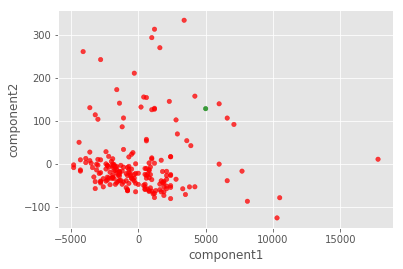

In [102]:
ax = drawVectors(T, pca.components_, df.columns.values, plt, scaleFeatures)
T = pd.DataFrame(T)
T.columns = ['component1', 'component2']
T.plot.scatter(x='component1', y='component2', marker='o', c = labels, alpha=0.75, ax=ax)
plt.show()